# Predicting Iris Flowers Class using Decision Tree Algorithm 
**By- `Suraj Honkamble`**
### Internmediate Level Task-2

### Import required libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Load and read the dataset

In [2]:
df=pd.read_csv('D:\\DATA SCIENCE Internship with LGMVIP\\data\\iris_decision_tree.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Drop Id

In [4]:
df.drop('Id', axis=1, inplace=True)

### Column Information
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. species: a.Iris Setosa b.Iris Versicolour c. Iris Virginica

### Data Understanding

In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Statistical Measures

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


1. **Average Sepal legth for all 3 classes is 5.84cm., average sepal width is 3.05cm, average petal length is 3.75cm and average petal width is 1.19cm.**
2. **Maximum sepal length is 7.9cm and minimum sepal length is 4.3 cm. Maximum sepal width is 4.4cm and minimum sepal width is 0.43cm, maximum petal length and width are 6.9cm and 2.5 cm respectively. Minimum petal length and minimum petal width are 1.76cm and 0.76cm respectively.**
3. **Each Class has 50 rows.**

### Missing value

In [9]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No missing values in dataset.**

### Exploratory Data Analysis

**Since all 4 input atributes here are continous numerical type hence use Boxplot to detect any outliers, KDE, Hist to check the data distribution.**

### Outliers

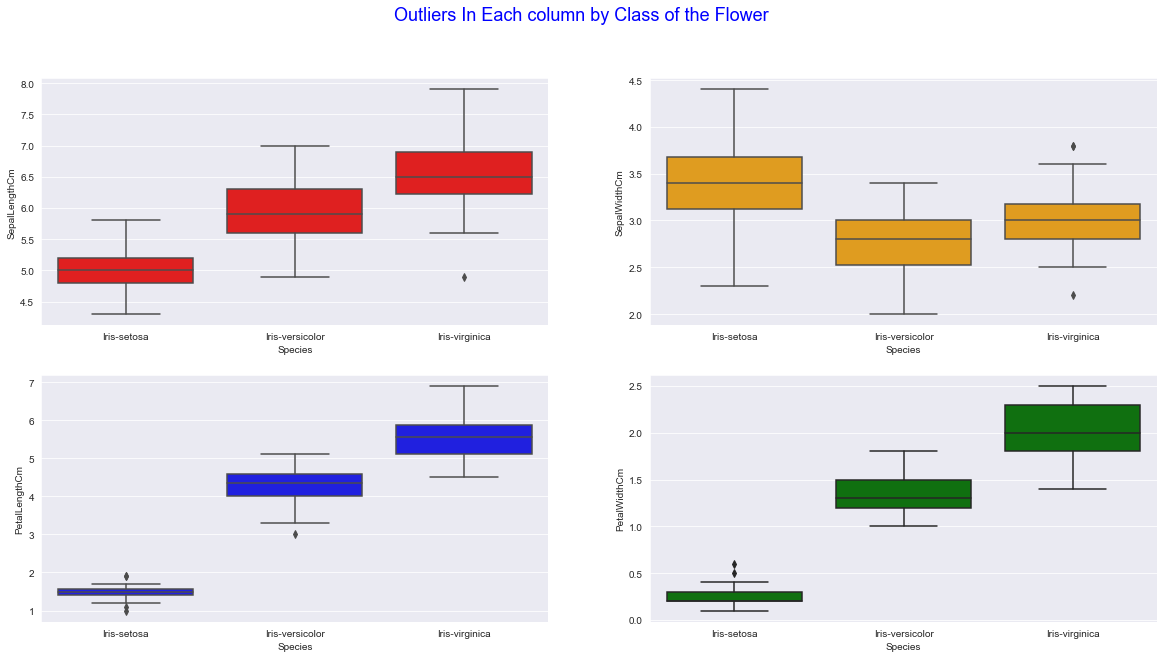

In [11]:
fig,ax=plt.subplots(2,2, figsize=(20,10))
plt.suptitle('Outliers In Each column by Class of the Flower', fontsize=18, color='blue')
sns.boxplot(y='SepalLengthCm', x='Species', data=df,  ax=ax[0,0], color='red')
sns.boxplot(y='SepalWidthCm', x='Species', data=df, ax=ax[0,1], color='orange')
sns.boxplot(y='PetalLengthCm', x='Species', data=df, ax=ax[1,0], color='blue')
sns.boxplot(y='PetalWidthCm', x='Species', data=df, ax=ax[1,1], color='green');

1. **There are some outliers but these are not extreme outliers so we will not treat them.**
2. **For an Iris Satosa: Sepal length, petal length, petal width is smaller as compared to other classes. but the sepal width is little larger than any other classes.**

### Data Destribution in each column

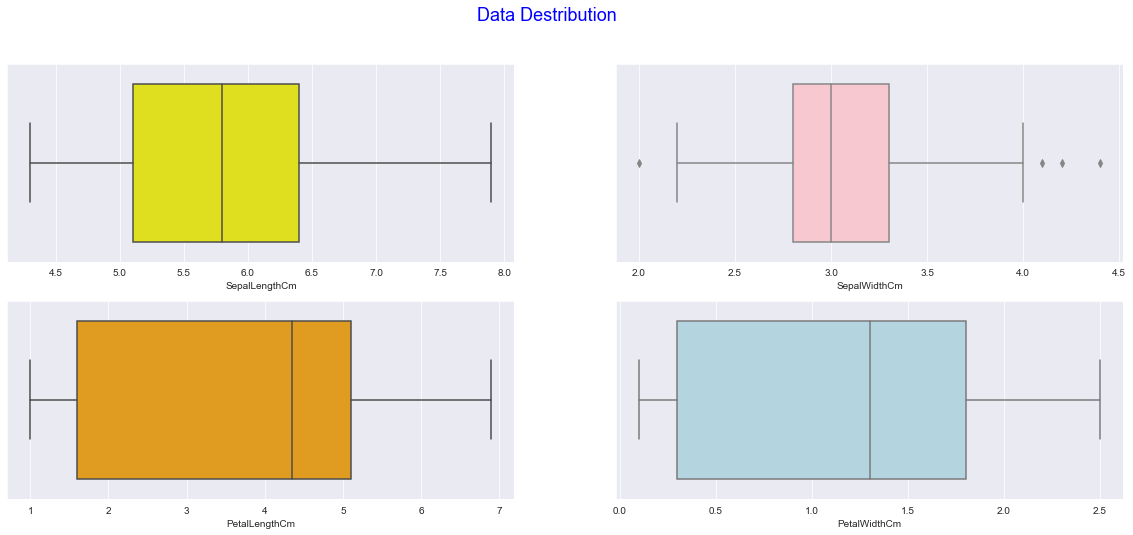

In [12]:
fig,ax=plt.subplots(2,2, figsize=(20,8))
plt.suptitle('Data Destribution', fontsize=18, color='blue')
sns.boxplot(x='SepalLengthCm', data=df, color='yellow', ax=ax[0,0])
sns.boxplot(x='SepalWidthCm', data=df, color='pink', ax=ax[0,1])
sns.boxplot(x='PetalLengthCm', data=df, color='orange', ax=ax[1,0])
sns.boxplot(x='PetalWidthCm', data=df, color='lightblue', ax=ax[1,1]);

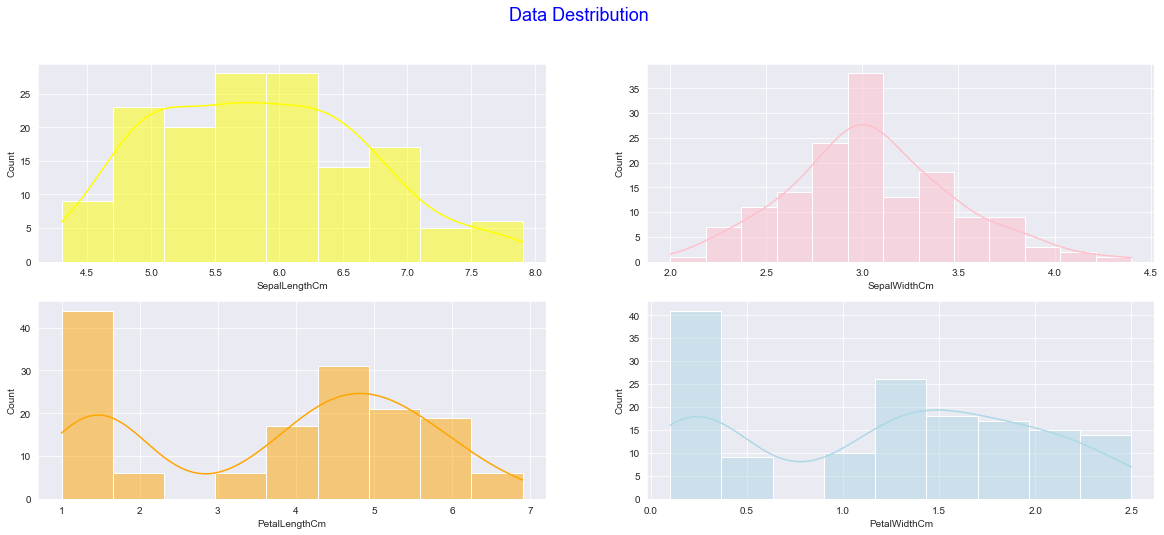

In [13]:
fig,ax=plt.subplots(2,2, figsize=(20,8))
plt.suptitle('Data Destribution', fontsize=18, color='blue')
sns.histplot(x='SepalLengthCm', data=df, color='yellow', kde=True, ax=ax[0,0])
sns.histplot(x='SepalWidthCm', data=df, color='pink', kde=True, ax=ax[0,1])
sns.histplot(x='PetalLengthCm', data=df, color='orange', kde=True, ax=ax[1,0])
sns.histplot(x='PetalWidthCm', data=df, color='lightblue', kde=True,  ax=ax[1,1]);

#### All atributes data points are somewhat look normally distributed and there is no extream outliers in of the column.

### Correlation between features

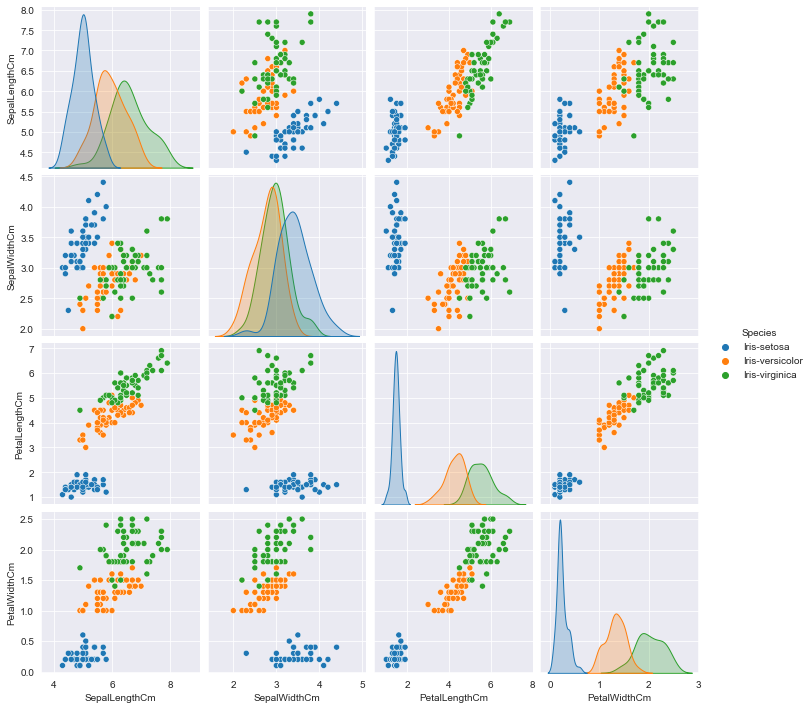

In [15]:
sns.pairplot(df, hue='Species');

**From above all the paiplots we can see that the blue data points which belongs to class setosa are easily seperated from rest two class data points.**

## Machine Learning Classification model

### Check whether Number of categories are equal in size or not

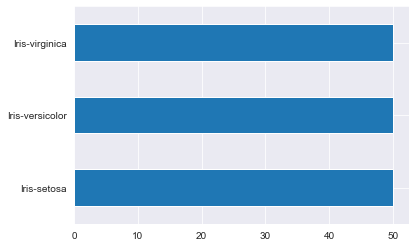

In [16]:
df['Species'].value_counts().plot(kind='barh');

#### Each class have equal number of rows

### Replace Class data type from object to string

In [17]:
df['Species'].replace({"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}, inplace=True)
df['Species'].unique()

array([0, 1, 2], dtype=int64)

### Split data into input and target feature

In [19]:
X=df.iloc[:,:-1]
y=df['Species']
X[:5]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### Split input and target data into train and test set

#### In the test set I want equal number of rows for each class, so that algorithm can learn from equal number of data points from each class and hence define `Stratify` in  train test split

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0,
                                               shuffle=True, stratify=y)
print("X train Shape", x_train.shape)
print("X test Shape", x_test.shape)
print("y train Shape", y_train.shape)
print("y test Shape", y_test.shape)

X train Shape (120, 4)
X test Shape (30, 4)
y train Shape (120,)
y test Shape (30,)


In [22]:
y_test.value_counts()

0    10
1    10
2    10
Name: Species, dtype: int64

### Feature Scalling
- Here all the column value are in centimeter ie all the values are in same scale so no need of tranformation.

## Select best fit algorithm to predict class of Iris flower
- Our target variable has 3 class hence use multiclass classification model to predict the target.

## Decision Tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_test_pred=dt.predict(x_test)

### Evaluate the model

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve

print("Confusion Matrix:\n",confusion_matrix(y_test, y_test_pred))
print(f"Out of total {y_test.shape[0]} test values {sum(y_test!=y_test_pred)} are missclassified")

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Out of total 30 test values 1 are missclassified


In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
acc=(accuracy_score(y_test, y_test_pred)*100).round(4)
results=pd.DataFrame({"Algorithm":["KNN Classifier"], "Accuracy":[acc]})
results

,Algorithm,Accuracy
0,KNN Classifier,96.6667


### Accuracy is 96.66%. Lets Perform hyperparameter tuning on Decision tree algorithm to increase the Accuracy using GridSearchSV.

In [44]:
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf=GridSearchCV(dt, param_grid=parameters, cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [53]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=2)
dt=dt.fit(x_train,y_train)
y_test_pred=dt.predict(x_test)
(accuracy_score(y_test, y_test_pred)*100).round(4)

96.6667

### Accuracy is not increasing after using GridSearchCV

### Graphocal representation of Rule Based Decision Tree

C:\Users\User\AppData\Local\Temp/ipykernel_6308/4081008235.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


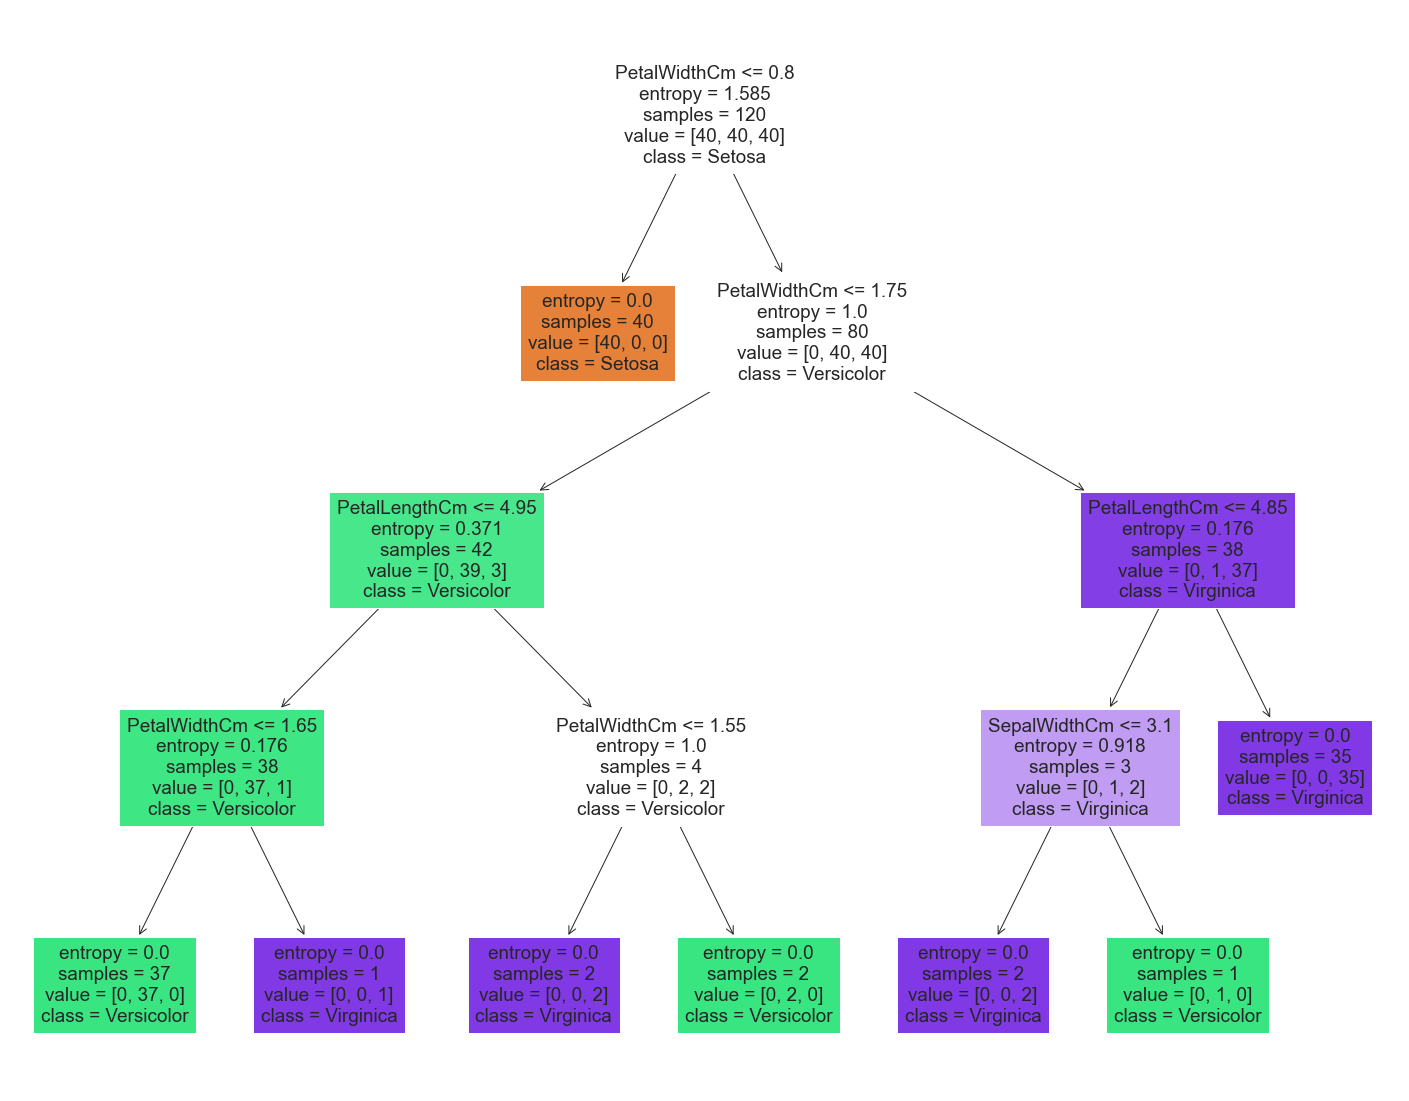

In [59]:
from sklearn import tree
features=df.columns
classes=['Setosa','Versicolor','Virginica']
fig = plt.figure(figsize=(25,20))
fir= tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names=classes,
                   filled=True)
fig.show()

## Test For New Data point

In [48]:
sample=pd.DataFrame({"SepalLengthCm":[4.4,3.5,5.4,6.1],
                     "SepalWidthCm":[3.5,2.4,4.0,3.5],
                     "PetalLengthCm":[2,5,4,6],
                     "PetalWidthCm":[2,1.5,1.4,1.8]})
sample

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.4,3.5,2,2.0
1,3.5,2.4,5,1.5
2,5.4,4.0,4,1.4
3,6.1,3.5,6,1.8


#### Predict for these data points

In [49]:
predict_class=dt.predict(sample)
for iris_class in predict_class:
    if iris_class==0:
        print("Flower is Satosa")
    elif iris_class==1:
        print("Flower is Versicolor")
    else:
        print("Flower is Virginica")

Flower is Satosa
Flower is Virginica
Flower is Versicolor
Flower is Virginica
